In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
train_data=pd.read_excel("Data_Train.xlsx")

In [106]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [107]:
pd.set_option('display.max_columns', None)

In [108]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [110]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [111]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [112]:
train_data.dropna(inplace=True)

## EDA

Date of journey is in string format so lets convert it into integer format

In [113]:
train_data["Journey_day"]= pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [114]:
train_data["Journey Month"] = pd.to_datetime(train_data["Date_of_Journey"],  format="%d/%m/%Y").dt.month

In [115]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [116]:
#Droping the column date of journey as we already seperated the journey day and journey month
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [117]:
#Departure time is when a plane leaves the gate
# Similar to date of jouney we can extract values from Dep_Time

# Extracting hours
train_data["Dep_hour"]= pd.to_datetime(train_data.Dep_Time).dt.hour

#Extracting Minutes
train_data["Dep_min"]= pd.to_datetime(train_data.Dep_Time).dt.minute

In [118]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [119]:
#Droping the column departure time
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [120]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [121]:
#Arrival time is when a plane pulls up to the gate
# Similar to date of jouney we can extract values from Arrival_Time and then droping the column

# Extracting hours
train_data["Arrival_hour"]= pd.to_datetime(train_data.Arrival_Time).dt.hour

#Extracting Minutes
train_data["Arrival_min"]= pd.to_datetime(train_data.Arrival_Time).dt.minute

#Droping the column
train_data.drop(["Arrival_Time"], axis=1, inplace=True)

#Showing the first 5 data
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [122]:
#Assigning and converting durations into lists
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i]

duration_hours = []
duration_mins = []
    

In [123]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [124]:
train_data['duration_hours'] = duration_hours
train_data['duration_mins'] = duration_mins

train_data.drop(['Duration'],axis=1,inplace= True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

Note:
    1. Nominal Data: if the data are not in any order.(Use OneHotEncoding)
    
    2. Ordinal Data: If the data are in order.(Use LabelEncoder)
    

In [125]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

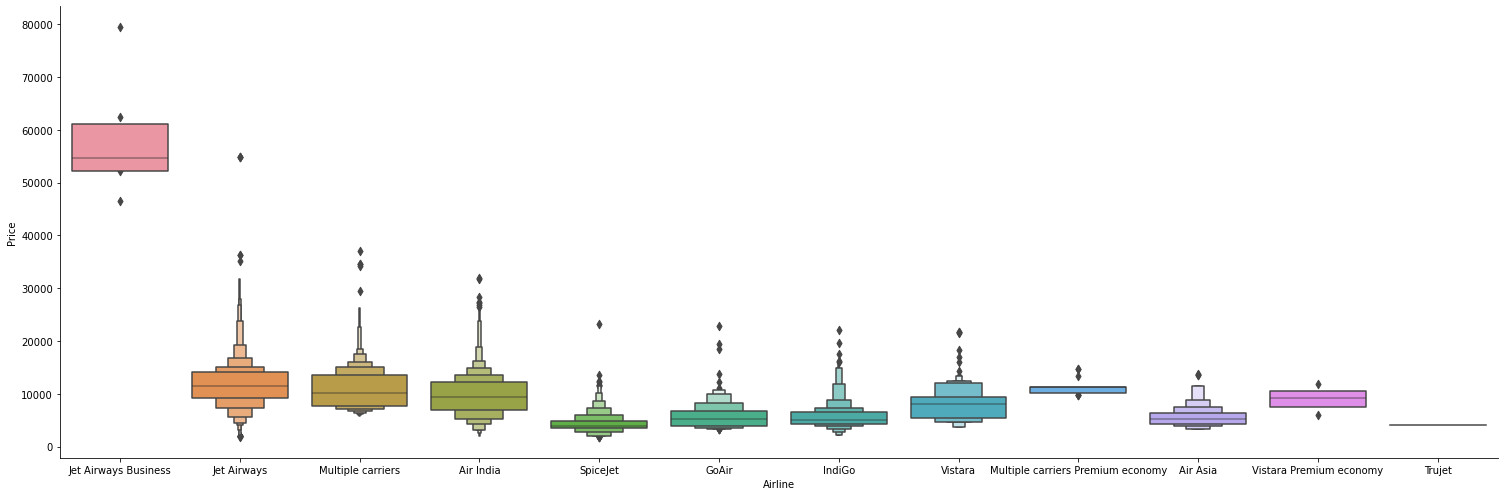

In [126]:
#Airline vs Price
sns.catplot(y="Price", x= "Airline", data=train_data.sort_values("Price", ascending=False), kind="boxen", height =7, aspect=3)
plt.show()

In [127]:
#As Airline is nominal categorical data we will perform OneHotEncoding
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [128]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

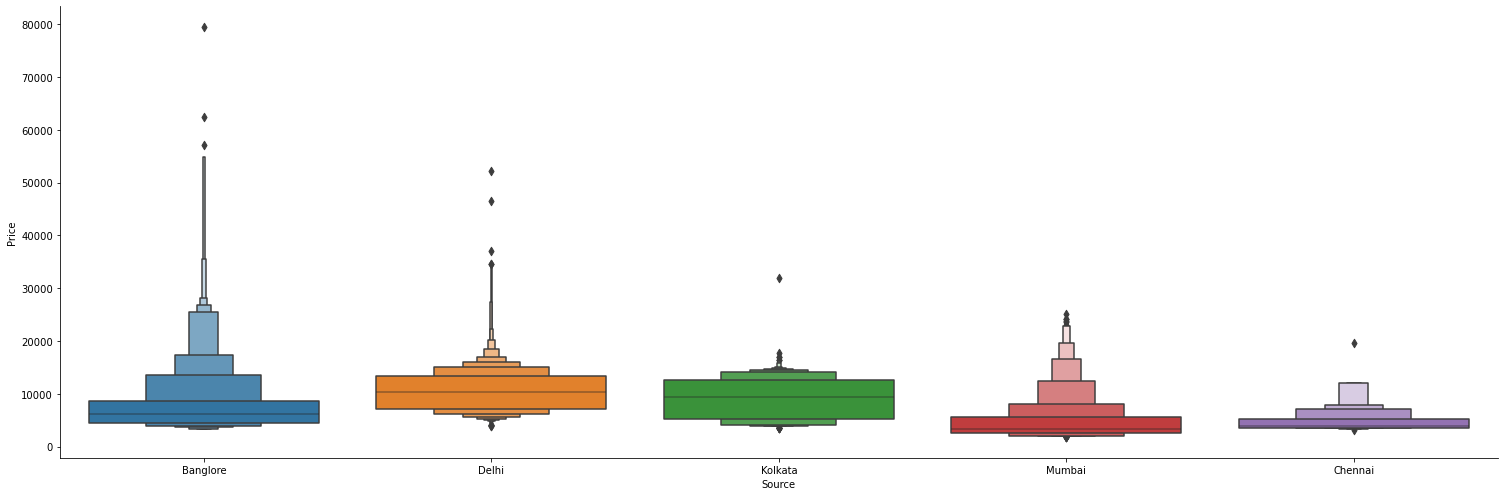

In [129]:
#Source vs Price
sns.catplot(y="Price", x="Source", data=train_data.sort_values("Price", ascending=False), kind="boxen", height =7, aspect=3)
plt.show()

In [130]:
#As Source is nominal categorical data we will perform OneHotEncoding
Source=train_data[["Source"]]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [131]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

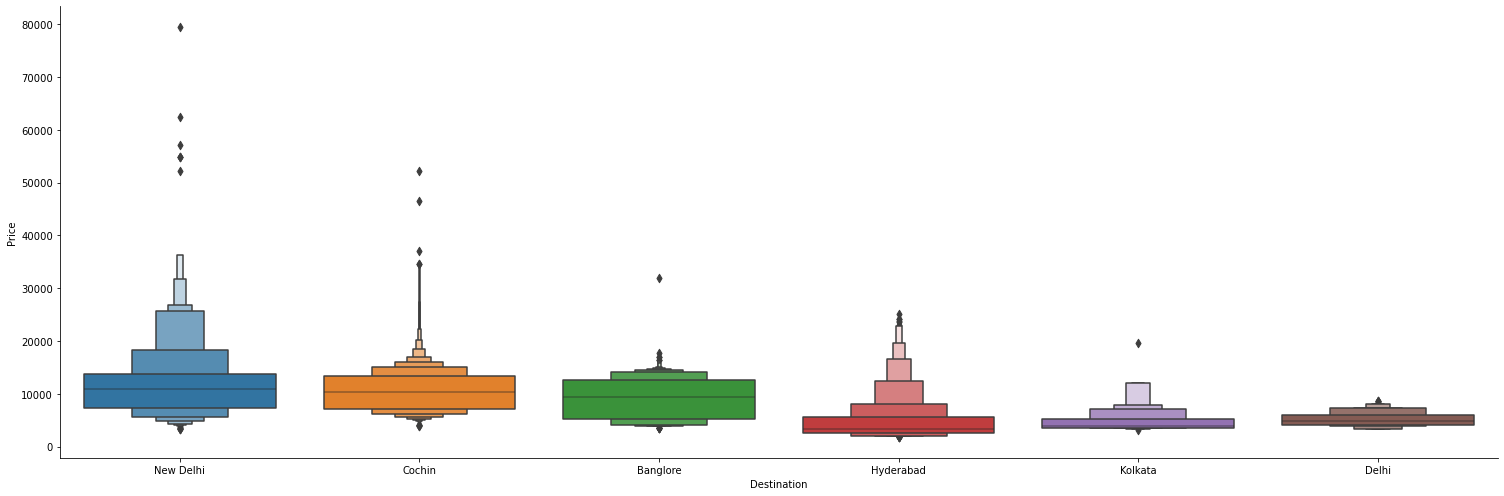

In [132]:
#Prive vs Destination
sns.catplot(y="Price", x="Destination", data=train_data.sort_values("Price", ascending=False),kind="boxen", height=7, aspect=3)
plt.show()

In [133]:
#As Destination is nominal categorical data we will perform OneHotEncoding
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [134]:
#Dropping Route and Additional info column as it route and number of stops are related to each other and additional info column contain 80% no info.
train_data.drop(["Route", "Additional_Info"], axis =1, inplace= True)

In [135]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

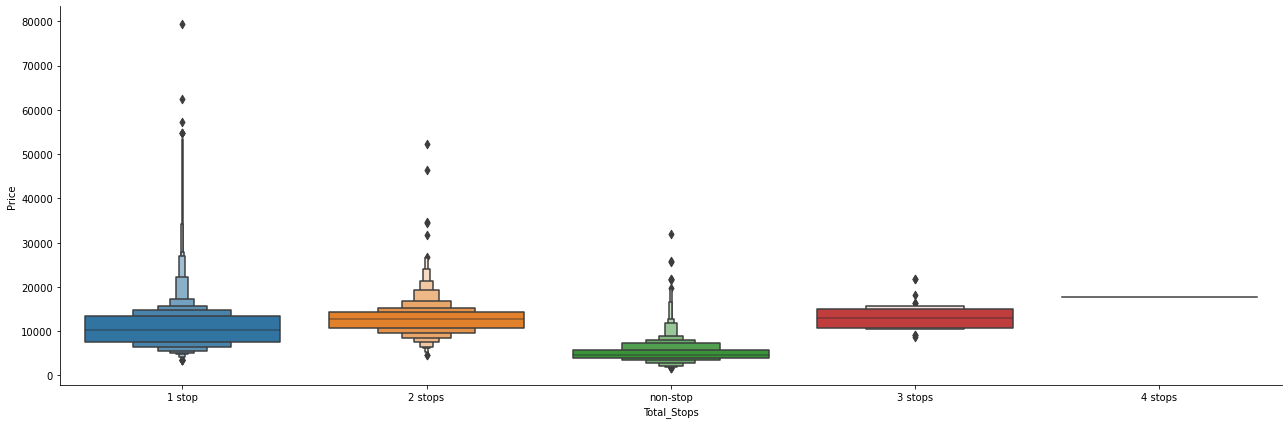

In [136]:
#Price vs number of stops
sns.catplot(y="Price",x="Total_Stops", data=train_data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

In [137]:
#For total stops we can perform label encoding. Now you can see that the price increases as the number of stops increases. So we will assign 0 for non stop and 4 for 4-stops
train_data.replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops": 3, "4 stops":4}, inplace=True)

In [138]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [139]:
#Combine all the onehotencoding , i.e, train_data, Airline, Source, Destination
train_data=pd.concat([train_data, Airline, Source, Destination], axis=1)

In [140]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [141]:
train_data.drop(["Airline","Source", "Destination"], axis=1, inplace=True)

In [142]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [143]:
train_data.shape

(10682, 30)

## Test Set

In [144]:
test_data= pd.read_excel("Test_set.xlsx")

In [145]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [146]:
test_data["Journey_day"]= pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey Month"] = pd.to_datetime(test_data["Date_of_Journey"],  format="%d/%m/%Y").dt.month

#Droping the column date of journey as we already seperated the journey day and journey month
test_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [147]:
#Departure time is when a plane leaves the gate
# Similar to date of jouney we can extract values from Dep_Time

# Extracting hours
test_data["Dep_hour"]= pd.to_datetime(test_data.Dep_Time).dt.hour

#Extracting Minutes
test_data["Dep_min"]= pd.to_datetime(test_data.Dep_Time).dt.minute

#Droping the column departure time
test_data.drop(["Dep_Time"], axis=1, inplace=True)

#Arrival time is when a plane pulls up to the gate
# Similar to date of jouney we can extract values from Arrival_Time and then droping the column

# Extracting hours
test_data["Arrival_hour"]= pd.to_datetime(test_data.Arrival_Time).dt.hour

#Extracting Minutes
test_data["Arrival_min"]= pd.to_datetime(test_data.Arrival_Time).dt.minute

#Droping the column
test_data.drop(["Arrival_Time"], axis=1, inplace=True)

#Assigning and converting durations into lists
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

test_data['duration_hours'] = duration_hours
test_data['duration_mins'] = duration_mins

test_data.drop(['Duration'],axis=1,inplace= True)


#As Airline is nominal categorical data we will perform OneHotEncoding
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True)


#As Source is nominal categorical data we will perform OneHotEncoding
Source=test_data[["Source"]]
Source=pd.get_dummies(Source, drop_first=True)


#As Destination is nominal categorical data we will perform OneHotEncoding
Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination, drop_first=True)

#Dropping Route and Additional info column as it route and number of stops are related to each other and additional info column contain 80% no info.
test_data.drop(["Route", "Additional_Info"], axis =1, inplace= True)

#For total stops we can perform label encoding. Now you can see that the price increases as the number of stops increases. So we will assign 0 for non stop and 4 for 4-stops
test_data.replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops": 3, "4 stops":4}, inplace=True)

#Combine all the onehotencoding , i.e, train_data, Airline, Source, Destination
test_data=pd.concat([test_data, Airline, Source, Destination], axis=1)

In [148]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [149]:
test_data.shape

(2671, 31)

## Feature Selection

In [150]:
train_data.shape

(10682, 30)

In [151]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [152]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [164]:
X=train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [159]:
Y = train_data.iloc[:, 1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

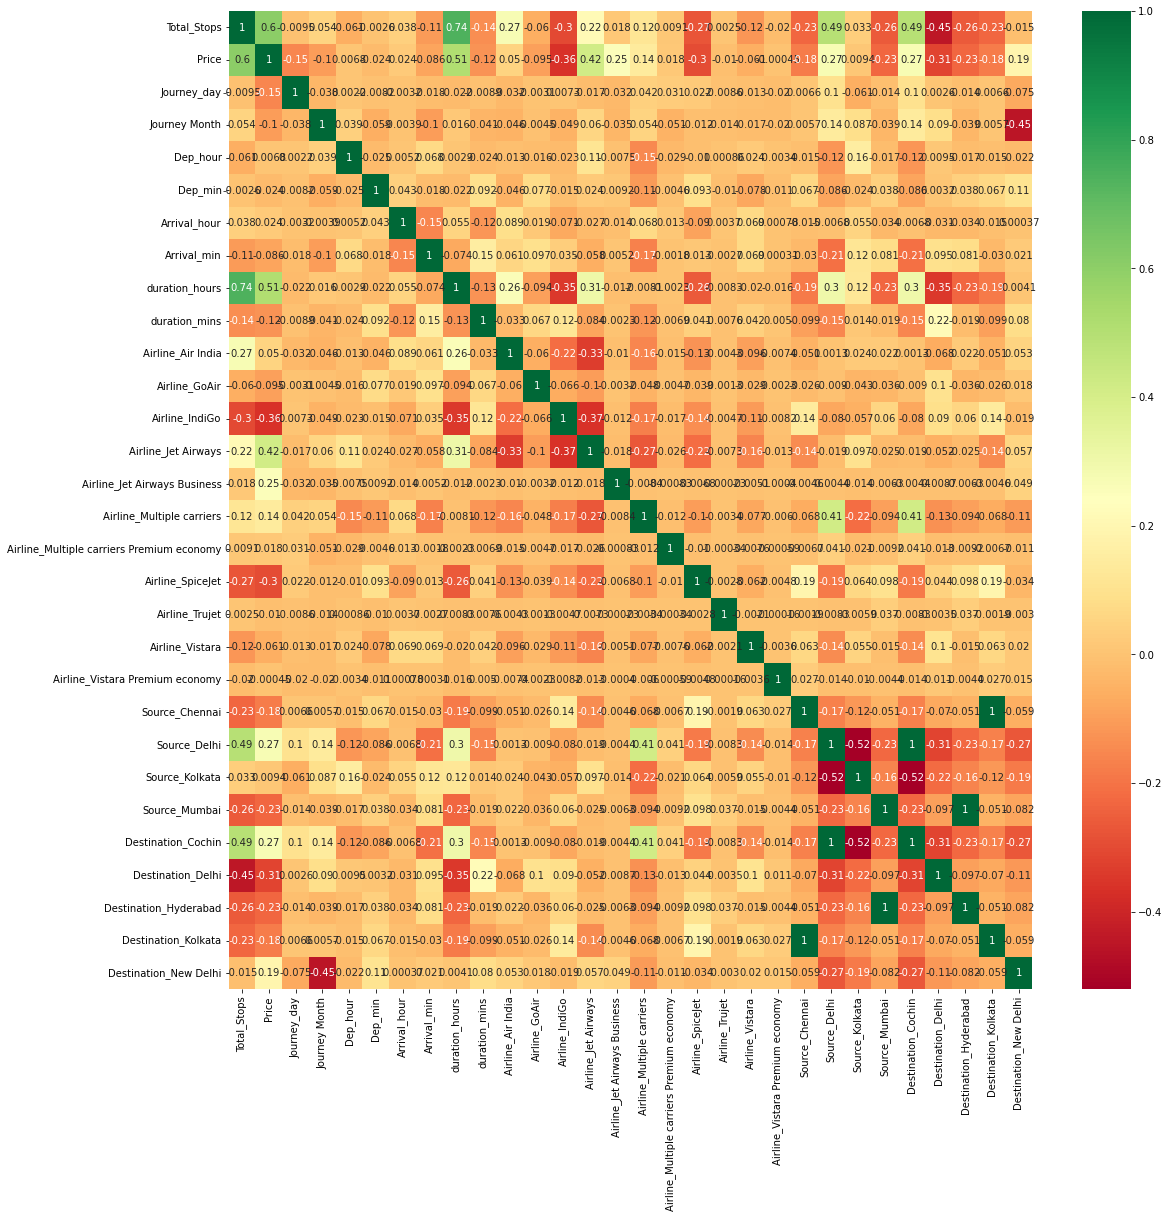

In [163]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [165]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [166]:
print(selection.feature_importances_)

[2.03583068e-01 1.44731851e-01 5.32548220e-02 2.40671683e-02
 2.10126753e-02 2.70196313e-02 1.92659278e-02 1.36524310e-01
 1.76233380e-02 1.09872085e-02 1.61026351e-03 1.63776633e-02
 1.40990695e-01 6.78621504e-02 2.10837296e-02 9.08168678e-04
 2.59222078e-03 1.03072581e-04 5.37493574e-03 8.34305040e-05
 4.48961154e-04 1.26038795e-02 3.27437759e-03 7.38513423e-03
 1.11087241e-02 1.80008132e-02 6.84977696e-03 5.08427720e-04
 2.47635751e-02]


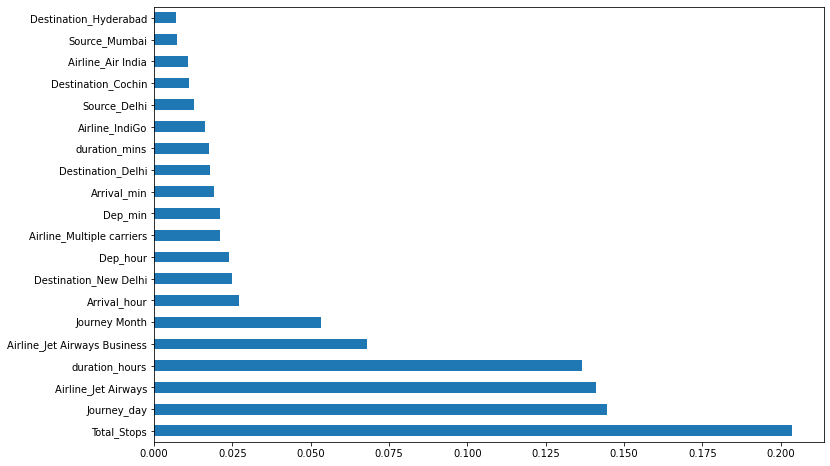

In [167]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, , test_size = 0.2, random_state = 42)



In [170]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [171]:
y_pred = reg_rf.predict(X_test)

In [174]:
reg_rf.score(X_train, y_train)

0.9528644609552772

In [175]:
reg_rf.score(X_test, y_test)

0.7977862015092927

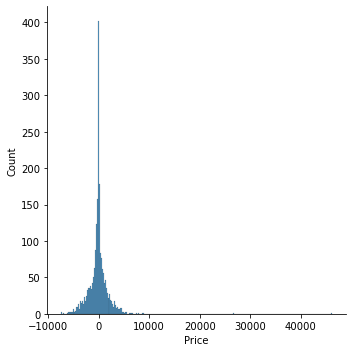

In [180]:
sns.displot(y_test-y_pred)
plt.show()

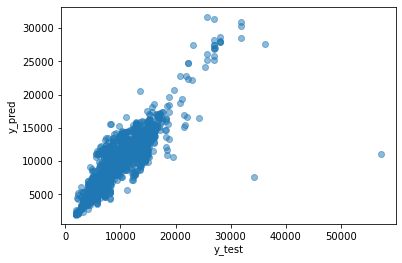

In [181]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [182]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1174.342945569405
MSE: 4360145.312579331
RMSE: 2088.096097544203


In [184]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(Y)-min(Y))

0.026887077025966846

In [185]:
metrics.r2_score(y_test, y_pred)

0.7977862015092927

## Hyperparameter Tuning
Choose following method for hyperparameter tuning

1. RandomizedSearchCV --> Fast
2. GridSearchCV

Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [186]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [188]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [190]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,) 

In [191]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  34.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  34.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  33.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  34.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  34.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   9.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   9.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [192]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [193]:
prediction = rf_random.predict(X_test)

C:\Users\alama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


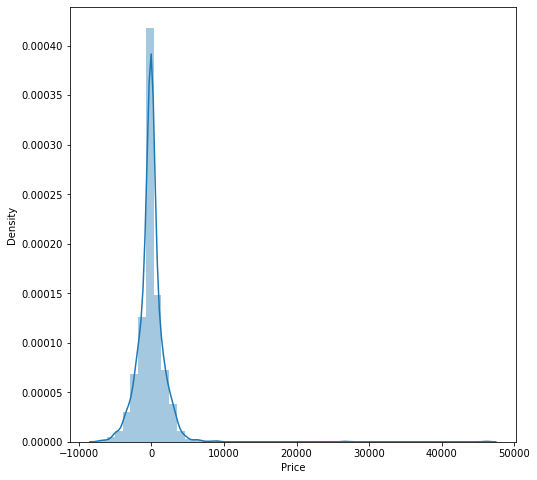

In [194]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

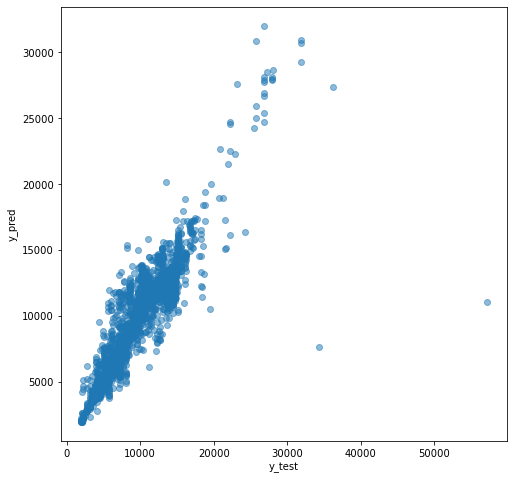

In [195]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [196]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1140.8327139055323
MSE: 4020183.465976783
RMSE: 2005.039517310515


## Save the model to reuse it again

In [197]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [199]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [200]:
y_prediction = forest.predict(X_test)

In [204]:
metrics.r2_score(y_test, y_prediction)

0.7977862015092927